# Etude du prix de l'immobilier à Boston avec Seaborn

Pour cet exercice, vous devrez reproduire et retrouver les lignes de commandes qui ont permis d'obtenir les visualisations affichées.

## Import du dataset

Importation des librairies nécessaires

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

Affichage du dataset

In [3]:
from sklearn import datasets
data = datasets.fetch_california_housing()

In [4]:
data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [5]:
dataset = pd.DataFrame(columns=data["feature_names"], data=data.data)  
dataset = pd.concat([dataset,pd.DataFrame({"Price":data.target})], axis=1)  
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Visualisation en diagramme en barres

Regarder la documentation concernant la fonction set() de Seaborn et comment la paramétrer afin d'avoir des tailles de visualisation correcte.

In [6]:
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc={'figure.figsize':(14,10)})

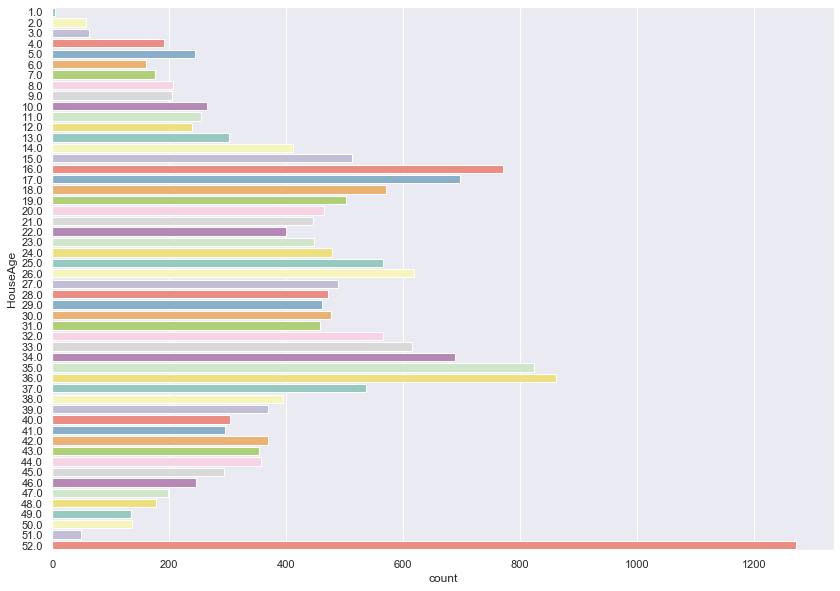

In [7]:
sns.countplot(data=dataset, y="HouseAge", palette="Set3")

In [8]:
#Résultat attendu

Création de la colonne AgeGroup qui découpe la colonne Age en tranche d'age en 5 catégories (détaillées dans la commande de résultat)

In [9]:
dataset["AgeGroup"] = pd.cut(dataset['HouseAge'], [0, 10, 20, 30, 40, 55])
dataset.AgeGroup

0        (40, 55]
1        (20, 30]
2        (40, 55]
3        (40, 55]
4        (40, 55]
           ...   
20635    (20, 30]
20636    (10, 20]
20637    (10, 20]
20638    (10, 20]
20639    (10, 20]
Name: AgeGroup, Length: 20640, dtype: category
Categories (5, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 55]]

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,AgeGroup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,"(40, 55]"
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,"(20, 30]"
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,"(40, 55]"
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,"(40, 55]"
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,"(40, 55]"


In [11]:
#Résultat attendu

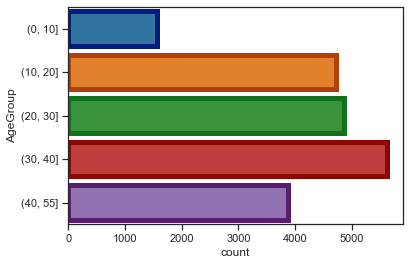

In [12]:
sns.set( style="ticks", rc={'figure.figsize':(6,4)})
sns.countplot(
    y="AgeGroup", 
    data=dataset, 
    palette=sns.color_palette("tab10"),
    edgecolor=sns.color_palette("dark", 5),
    linewidth=5,
)

## Visualisation en boite à moustaches

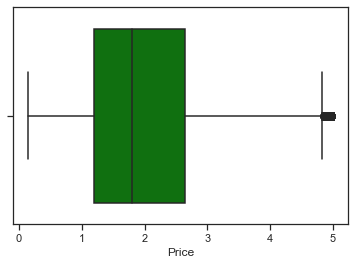

In [13]:
sns.set( style="ticks", rc={'figure.figsize':(6,4)})
sns.boxplot(data=dataset, x="Price", color="green")

In [14]:
#Résultat à atteindre

In [15]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,AgeGroup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,"(40, 55]"
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,"(20, 30]"
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,"(40, 55]"
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,"(40, 55]"
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,"(40, 55]"
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,"(20, 30]"
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,"(10, 20]"
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,"(10, 20]"
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,"(10, 20]"


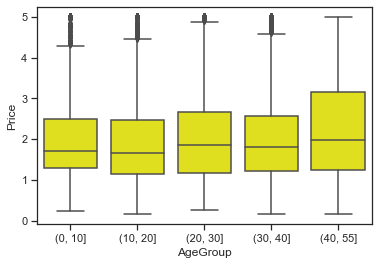

In [16]:
sns.boxplot(data=dataset, y="Price",x="AgeGroup", color="yellow")


## Visualisation en nuage de point

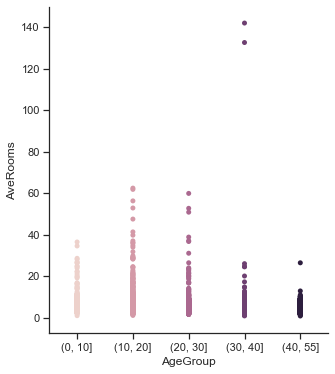

In [17]:
sns.set( style="ticks", rc={'figure.figsize':(5,6)})
sns.stripplot(
    data=dataset,
    x="AgeGroup",
    y="AveRooms",
    jitter=False,
    palette=sns.cubehelix_palette(5)
)

sns.despine()

In [18]:
#Résultat attendu

In [19]:
sns.set(style="darkgrid")

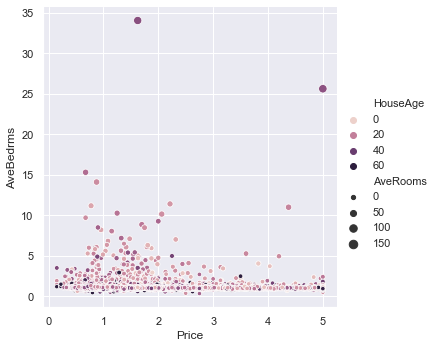

In [20]:
sns.relplot(
    data=dataset, 
    x="Price", 
    y='AveBedrms',
    hue="HouseAge", 
    size="AveRooms", 
    height= 5
)

In [21]:
#Résultat attendu

On créé un nouveau dataset, qu'on nommera dataset_2 qui récupère seulement les données pour lesquels le nombre de chambre (AveBedrms) est inférieur strictement à 5.

In [22]:
dataset_2 = dataset.AveBedrms <  1
dataset_2

0        False
1         True
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: AveBedrms, Length: 20640, dtype: bool

In [23]:
dataset_2 = dataset.query("AveBedrms <  5")
dataset_2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,AgeGroup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,"(40, 55]"
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,"(20, 30]"
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,"(40, 55]"
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,"(40, 55]"
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,"(40, 55]"


In [24]:
dataset_2 = dataset.loc[dataset["AveBedrms"]<5]
dataset_2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,AgeGroup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,"(40, 55]"
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,"(20, 30]"
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,"(40, 55]"
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,"(40, 55]"
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,"(40, 55]"


In [25]:
#Rendu attendu : Ex7 Tronquer un tableau

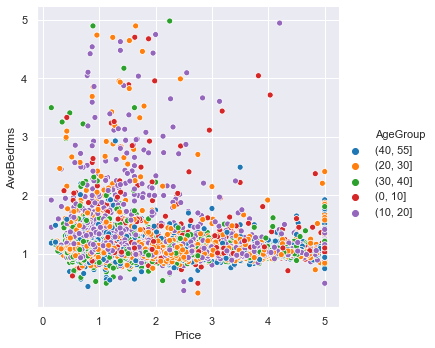

In [26]:

sns.relplot(
    data=dataset_2, 
    x="Price", 
    y='AveBedrms',
    hue="AgeGroup",
    palette=sns.color_palette("tab10", 5),
    height= 5
)

In [27]:
#Ex 8 

## Visualisation globale de l'ensemble des variables

In [28]:
dataset.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price', 'AgeGroup'],
      dtype='object')

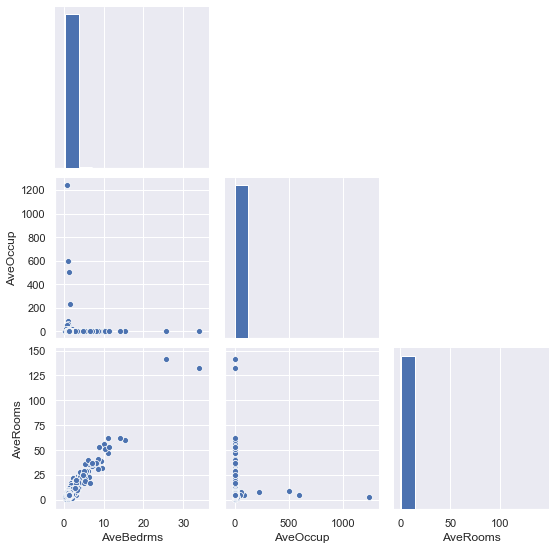

In [29]:
sns.pairplot(dataset,
                 x_vars=["AveBedrms", "AveOccup", "AveRooms"],
                 y_vars=["AveBedrms", "AveOccup", "AveRooms"],
                 corner=True
                )

Qu'est-ce que vous voyez ?

##### Il y a une relation directe entre le nombre de pièces et le nombre de chambres